**API Command: kaggle datasets download -https://www.kaggle.com/datasets/ammaraahmad/used-cars-dataset**

*Introduction*: The Data set has a good mixture between numerical and categorical variables, with prevalecense of numerical ones. It is structured and cleaned, without hidden formats that need to be adapted or missing values with funny objects. The purposes of the dataset is to support different companies define the price of sale for similar cars in a secondary market. Nowadays whenever we decide to buy or sell a car online there is a handfull of information available about the upper and lower limit we may charge depending on the characteristics of the car. This is the type of dataset used to calculate these limits.

*Process/Approach*: Check the Data Set and discover its main characteristics.  Start basic analysis and adjust rows or columns to our main goal. Define the dependent and independent variables that will be used in a model. Prepare a graphical overview to confirm some insights about the data. Build a linear model with the available that and validate its usability (how much the model explains, errors metrics, multicolinearity, p-values).

*Conclusion*: Conclude the model with a formula able to predict the dependent variable with a high level of accuracy and test it on a secondary data set (test set).

## Import Libraries

In [1]:
# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline


<font color=darkblue>
    
# Loading and exploring the data


In [2]:
df = pd.read_csv("D:/ESTUDOS/UTS/Subjects/42047 Data Processing using Phyton/Assignement2/usedcars.csv")  

In [3]:
df.shape #The File has 201 Rows with Data AND 33 Columns

(201, 33)

In [4]:
df.dtypes.value_counts()

float64    15
object     10
int64       8
dtype: int64

In [5]:
df.columns #The Columns names are described as below. Names are very long but will remain for this exercise.

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'price_binned', 'diesel', 'gas',
       'normalized_length', 'normalized_width', 'normalized_height'],
      dtype='object')

In [6]:
df.sample(10) 
#Below is an overview of 10 rows rondomly selected. Showing the content and some characteristics of each variable.

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,price_binned,diesel,gas,normalized_length,normalized_width,normalized_height
152,0,91.0,toyota,std,four,sedan,fwd,front,95.7,166.3,64.4,53.0,2081,ohc,four,98,2bbl,3.19,3.03,9.0,70.0,4800.0,30,37,6938,7.833333,6.351351,Low,0,1,-0.641201,-0.708577,-0.313204
10,0,192.0,bmw,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925,10.217391,8.103448,Low,0,1,0.210921,-0.518235,0.217881
156,0,91.0,toyota,std,four,sedan,fwd,front,95.7,166.3,64.4,53.0,2094,ohc,four,98,2bbl,3.19,3.03,9.0,70.0,4800.0,38,47,7738,6.184211,5.000000,Low,0,1,-0.641201,-0.708577,-0.313204
17,2,121.0,chevrolet,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151,5.000000,4.433962,Low,0,1,-2.686295,-2.659592,-0.231498
64,-1,93.0,mercedes-benz,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552,10.681818,9.400000,Median,1,0,1.355199,2.098980,1.116639
95,2,168.0,nissan,std,two,hardtop,fwd,front,95.1,162.4,63.8,53.3,2008,ohc,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,8249,7.580645,6.351351,Low,0,1,-0.957704,-0.994092,-0.190646
50,1,113.0,mazda,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695,7.580645,6.184211,Low,0,1,-0.600624,-0.803749,0.136175
66,0,93.0,mercedes-benz,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176,10.681818,9.400000,Median,1,0,1.079274,2.098980,0.462997
170,-1,65.0,toyota,turbo,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2480,ohc,four,110,idi,3.27,3.35,22.5,73.0,4500.0,30,33,10698,7.833333,7.121212,Low,1,0,0.113536,0.290723,0.462997
173,-1,65.0,toyota,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2458,ohc,four,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,11248,8.703704,7.343750,Low,0,1,0.113536,0.290723,0.054470


In [7]:
df.info()
# The File includes categorical (object)  and numerical values (int & float).
# The Information showing Non-null Count is a reference to missing values on the columns. 
# Missing values not always come as NAN, but can be hidden in different forms in a data set, therefore additional analysis may be required.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       199 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [8]:
df.isnull().sum() 
# Another way to check for missing values

symboling             0
normalized-losses    37
make                  0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
city-L/100km          0
highway-L/100km       0
price_binned          0
diesel                0
gas                   0
normalized_length     0
normalized_width      0
normalized_height     0
dtype: int64

I am not an specialist in cars or characteristics of cars, though it is necessary to start making decisions about the dataset and what is usefull for the analysis. At this point it is clear that some columns have a high multicolinearity, which means they tell the same story, therefore the use of two or three columns with the same meaning will only create more noisy to the model, without any additional benefit to the output (conclusion).

Furthermore, some variables do not seem to have a high significance on explaining anything related to the cars. Therefore they can be dropped.

Dealing with missing values is also a very important decision, specially if they are numerous. In our dataset this is not the case and a simple solution for the missing values is to drop the rows, because they are very few in numbers.

Decisions:
- Drop the columns 'normalized_length','normalized_width','normalized_height' because they do not provide additional value to the dataset than columns 'length', 'width', 'height'
- Drop the column 'normalized-losses' since there is a reasonable number of missing values and no explanation of what this variable mean
- Drop the column 'symboling' also no information on what this variable mean 
- Price binned will also be drop, because there is already a column with the real price of the car and this will provide more accuracy to our analysis.

In [9]:
# drop the columns
df = df.drop(['normalized-losses', 'symboling', 'normalized_length','normalized_width','normalized_height','price_binned'], axis=1)

In [10]:
# drop the missing values
df =df.dropna()

In [11]:
#checking againg for missing values
df.isnull().sum() 

make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
highway-L/100km      0
diesel               0
gas                  0
dtype: int64

In [12]:
# Checking for dupplicate rows (None)
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))
df = df.drop_duplicates()

number of duplicate rows: (0, 27)


In [13]:
df.describe().T
#These are the statistical values for numerical columns. 
# We can see the mean,standard deviation, minimum, maximum as well as first, second and third quantiles.
# When mean and 50% are close to each other, most of the data is concentrated around this value. If they are close to each other, the data has a high dispersion. 

,count,mean,std,min,25%,50%,75%,max
wheel-base,193.0,98.923834,6.152409,86.600000,94.500000,97.000000,102.400000,120.900000
length,193.0,174.326425,12.478593,141.100000,166.300000,173.200000,184.600000,208.100000
width,193.0,65.893782,2.137795,60.300000,64.100000,65.400000,66.900000,72.000000
height,193.0,53.869948,2.394770,47.800000,52.000000,54.100000,55.700000,59.800000
curb-weight,193.0,2561.507772,526.700026,1488.000000,2145.000000,2414.000000,2952.000000,4066.000000
engine-size,193.0,128.124352,41.590452,61.000000,98.000000,120.000000,146.000000,326.000000
bore,193.0,3.330622,0.272385,2.540000,3.150000,3.310000,3.590000,3.940000
stroke,193.0,3.248860,0.315421,2.070000,3.110000,3.290000,3.410000,4.170000
compression-ratio,193.0,10.143627,3.977491,7.000000,8.500000,9.000000,9.400000,23.000000
horsepower,193.0,103.481865,37.960107,48.000000,70.000000,95.000000,116.000000,262.000000


In [14]:
#Check how many unique values the variable make (Brand) has
df["make"].nunique()

21

In [15]:
#Check the top 10 unique names in all categorical variables (object)
# This shows the distribution of the main categories (high, low, homogenious)
num_to_display = 10  
for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # Will also show the NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")  # just for more space in between

toyota           32
nissan           18
honda            13
mitsubishi       13
subaru           12
mazda            12
volkswagen       12
peugot           11
volvo            11
mercedes-benz     8
Name: make, dtype: int64
Only displaying first 10 of 21 values.



std      158
turbo     35
Name: aspiration, dtype: int64



four    112
two      81
Name: num-of-doors, dtype: int64



sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64



fwd    114
rwd     71
4wd      8
Name: drive-wheels, dtype: int64



front    190
rear       3
Name: engine-location, dtype: int64



ohc     141
ohcf     15
ohcv     13
l        12
dohc     12
Name: engine-type, dtype: int64



four      153
six        24
five       10
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64



mpfi    88
2bbl    64
idi     19
1bbl    11
spdi     9
spfi     1
mfi      1
Name: fuel-system, dtype: int64





# EDA


### Distribution plots
Below is a collection of distribution plots for numerical variables.
Whithin each graph it is possible to see how the data is distributed along the min and max values available.
Some of them have most of the distribution in the middle, while other have in the beginning (left side). The distribution of the occurance will have an impact on the statistics of the variables that can also be confirmed by the boxplots and histograms.

Diesel and Gas are not good variables for box plot as they only have two occurences 1 or 0, not a range of numbers that show a distribution and the behaviour of the variables.

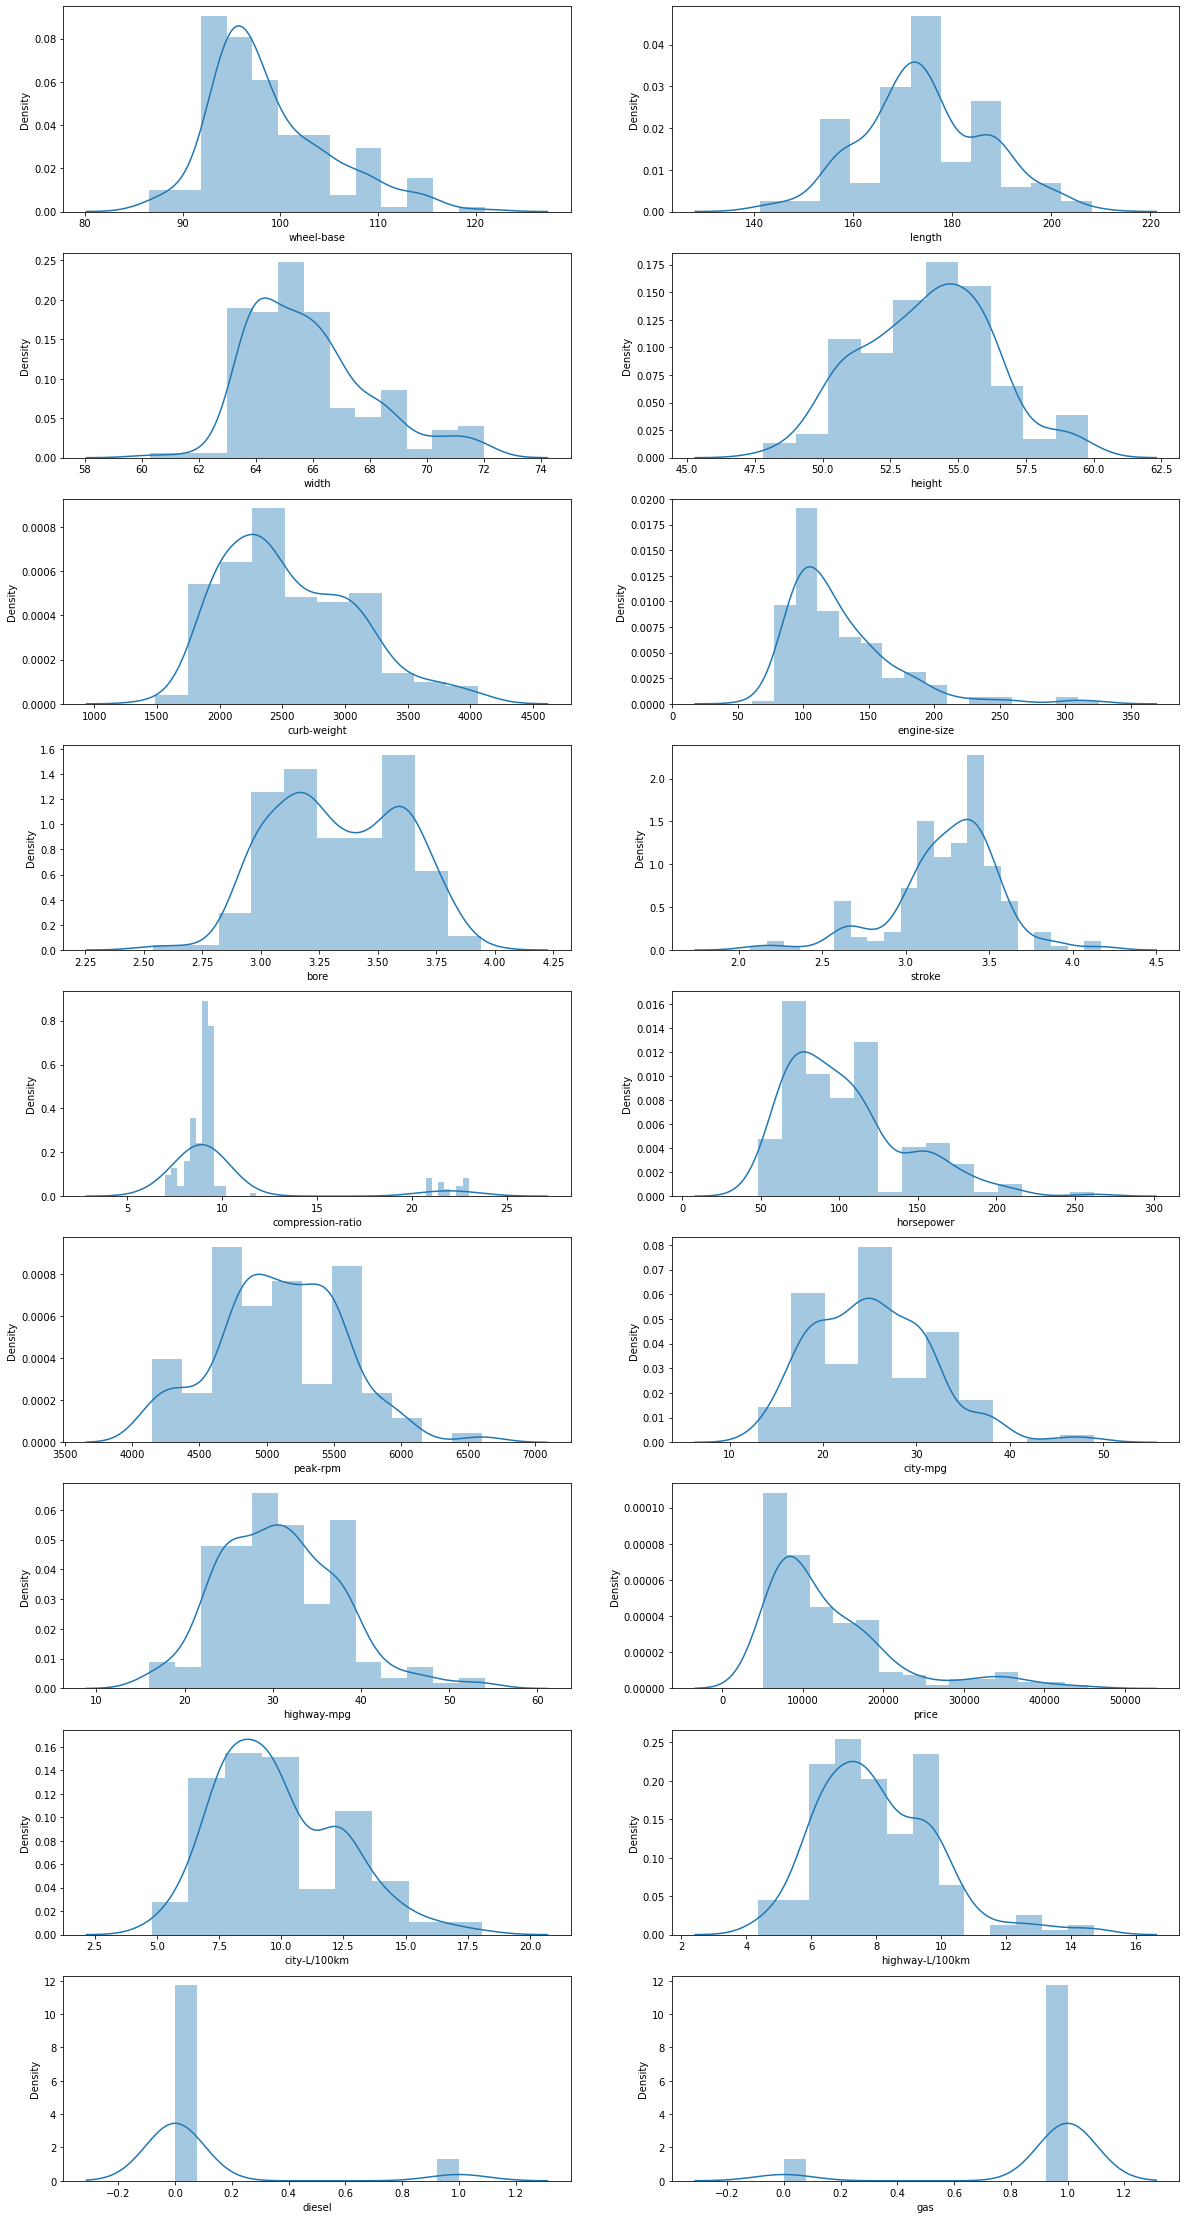

In [16]:
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 40))

for i in range(len(all_col)):
    plt.subplot(9, 2, i + 1)
    sns.distplot(df[all_col[i]]) 
 
plt.show()

### Boxplots

The Boxplots are also a similar way to see the distribution and statistics from the variables. It shows the median, quartiles, upper and lower limits of quartiles and outliers. The blue boxes below are supposed to be located exactly in the same place as the hills of the distribution plots. The horizontal T form attached to the blue boxes are  the upper and lower limits of the quartiles, which gives additional room for values that do not fit the mean in the dataset. If the values are above or below this limit it is classified as outliers and represented by a dot. Therefore the upper and lower limits are important to show if the variables have many outliers or not. We can see below that the following variables have outliers: 'wheel-base', 'width', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'price', 'highway-L/100km'.

Diesel and Gas are not good variable for box plot as they only have to occurances 1 or 0, not a range of numbers that show a distribution and the behavior of the variables.

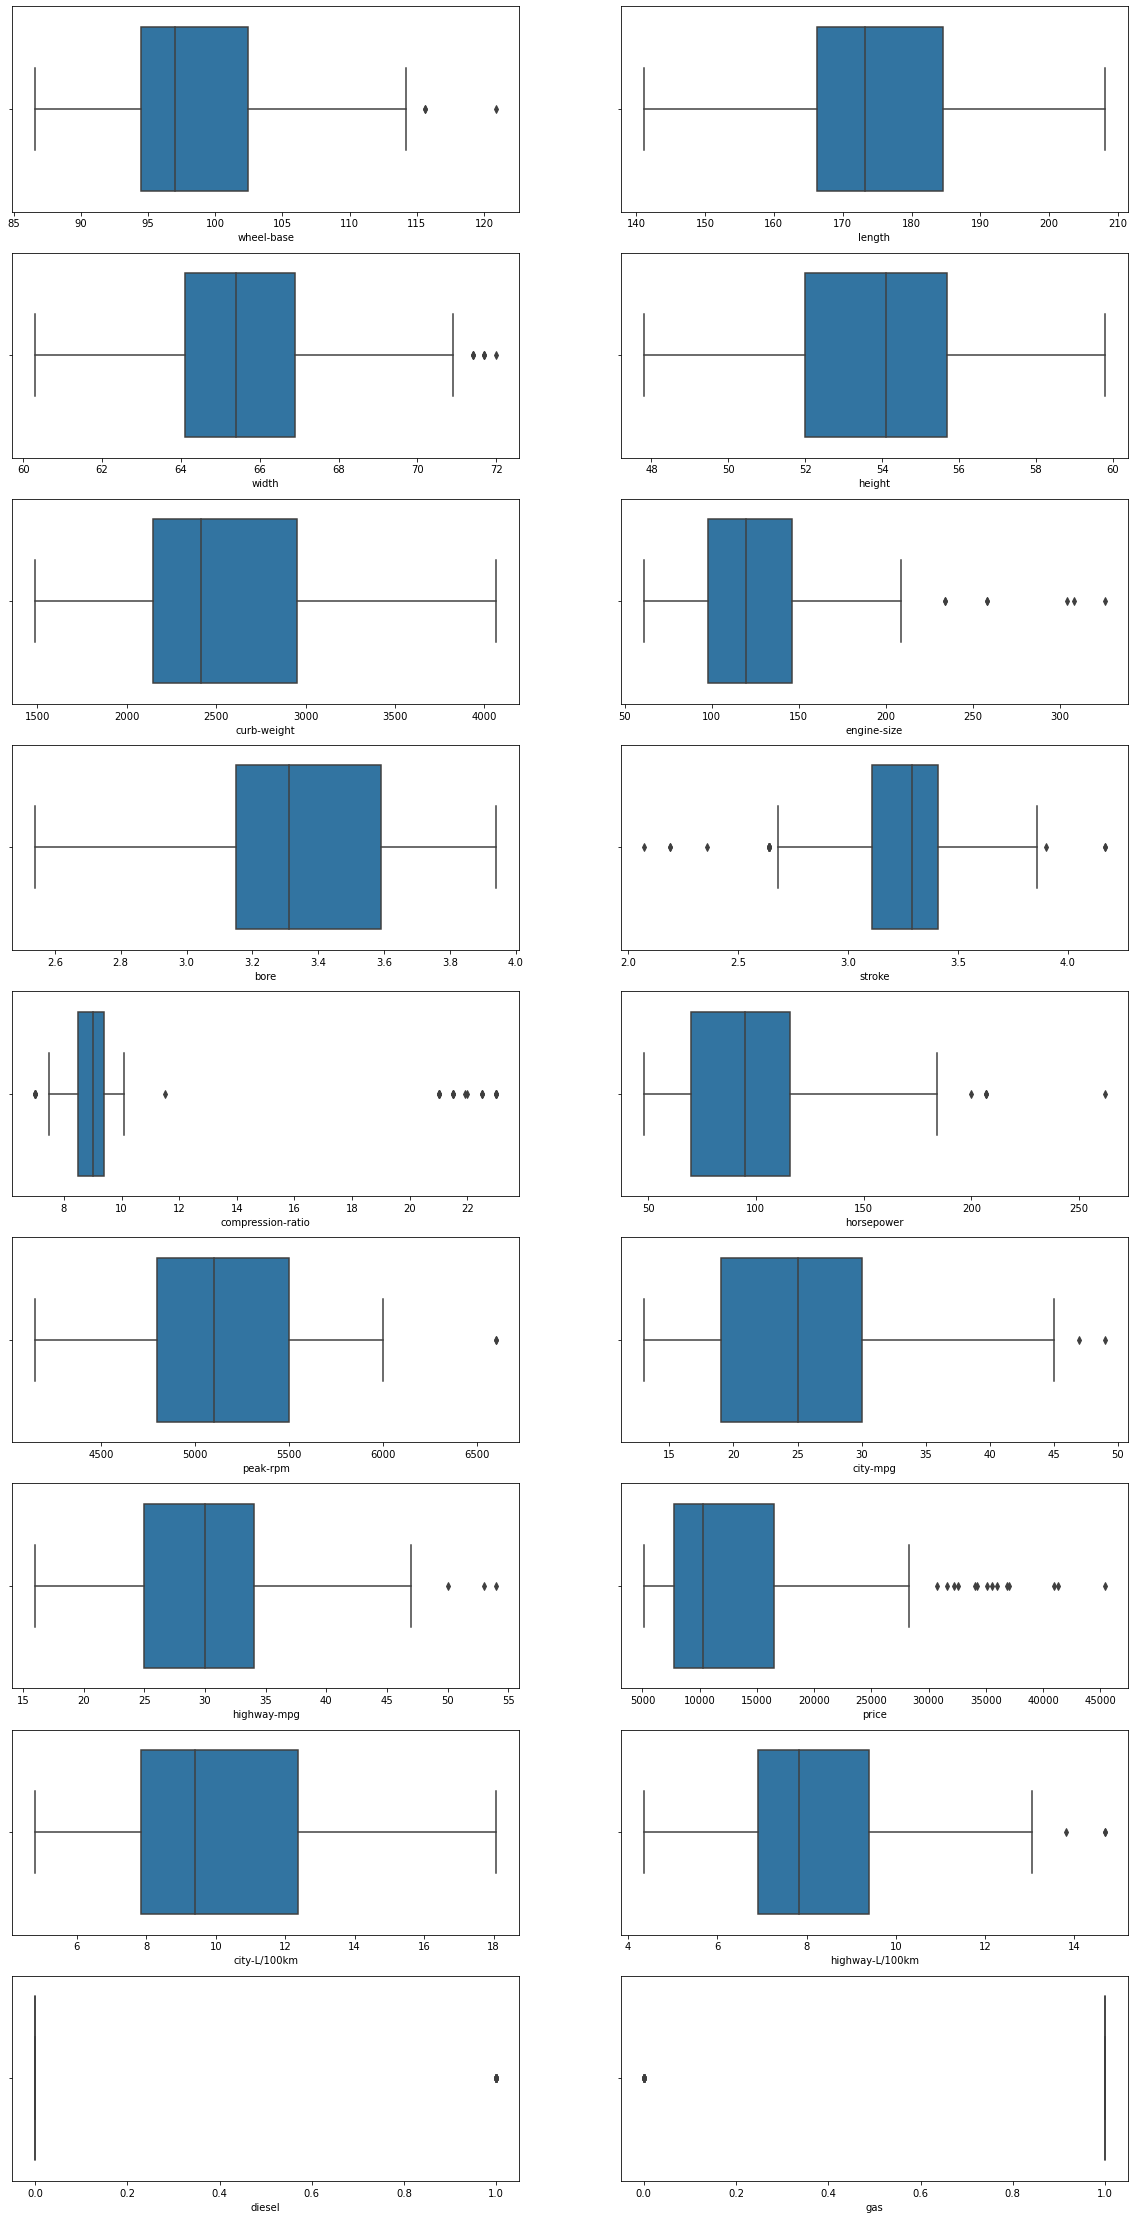

In [17]:
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 40))

for i in range(len(all_col)):
    plt.subplot(9, 2, i + 1)
    sns.boxplot(df[all_col[i]]) 
 
plt.show()

### Correlation Matrix

The Matrix shows how much two variables works towards the same goal, if one increases the other will increase too. 
Negative correlation would be the opposite, if one variable increases, the other will decrease.
The values show the proportion of this relation, if the correlation is one, the variables are perfect correlated, an increase of one point in one variable will result in the same increase for the second variable.

Correlation Matrix also shows the multicolinarity between variables, which I explained before as the ability to explain the same thing and provide extra noisy instead of valuable information.

* Correlation above 0.5 or below -0.5 are statistically relevant. 

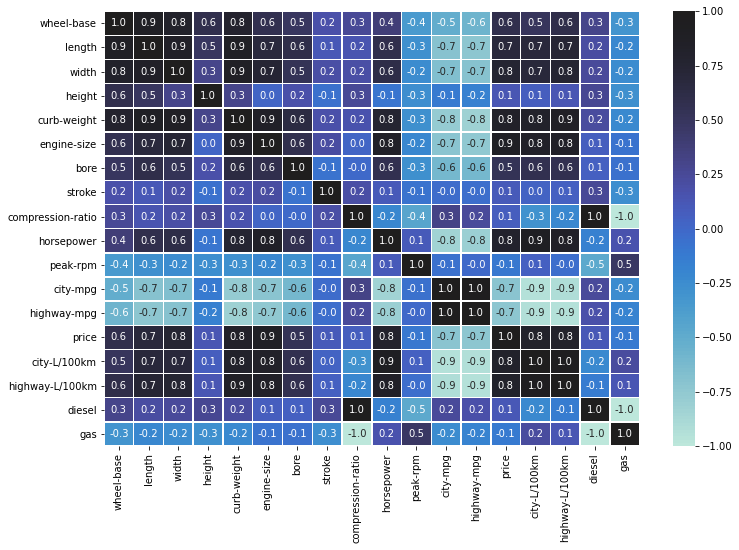

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

At this point it is necessary to make further decisions regarding the dataset in order to proceed with the model and have a more valuable output. Based on the output of the data, reduce the number of variables with a high correlation and similar background. 
* Define Price as the dependent variable of the model, since it is the information I want to calculate once all other variables are available.

* compression-ratio has a perfect positive correlation (1.0) with diesel and negative with gas(-1.0), therefore they may explain the same thing, so will drop compression-ratio.
* height has low correlation with other variables, except length and width. Since legth and width probably can explain alone the characateristics from a car, hight may be dropped. 
* No further adjustment will be considered, despite some possibilities. The model will confirm the need of some varibles anyway (p value > 0.05).

In [19]:
df = df.drop(['compression-ratio', 'height'], axis=1)

### Countplot

The countplot below shows how many occurances of the different car brands are in our data set (already seen above too). Toyota is by far the highest with over 30 cars from this brand, followed by nissan and mitsubishi. This may give a hint about the region where the dataset was collected -> Asia.

<AxesSubplot:xlabel='count', ylabel='make'>

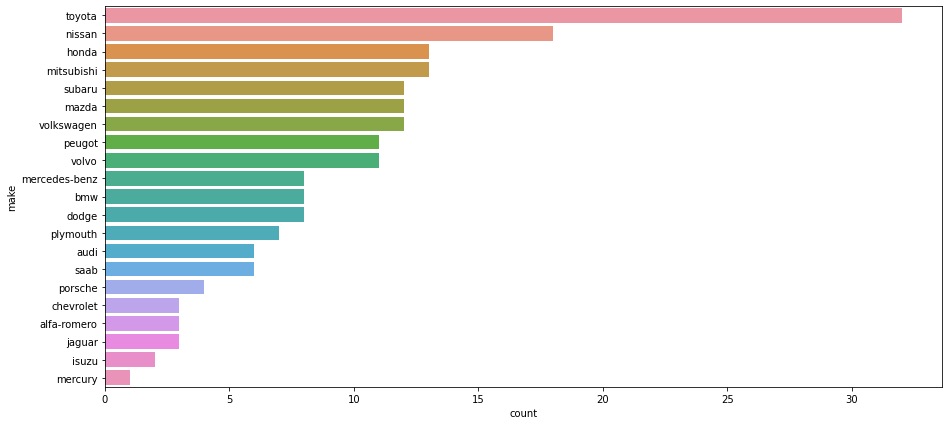

In [20]:
plt.figure(figsize=(15, 7))
sns.countplot(y="make", data=df, order=df["make"].value_counts().index)

### Scatterplot

Scatterplots can give visual confirmation of the level of correlation between variables. As we have seen from the correlation matrix above, the graphs below confirm the highest correlation between price and the variables engine-size, curb weight, width.

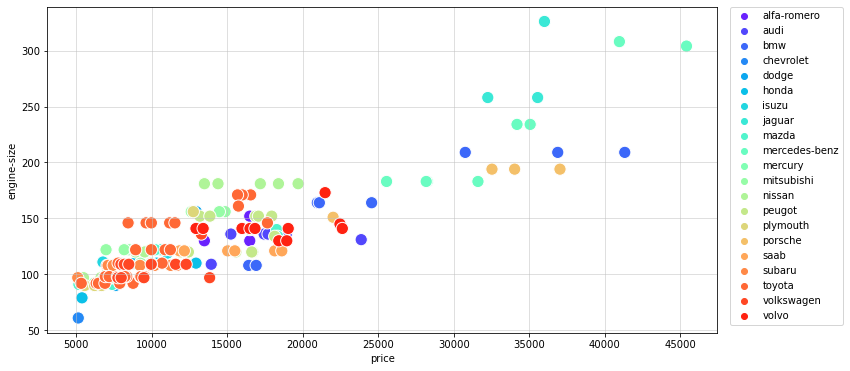

In [21]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="price", y="engine-size", data=df, hue=df['make'], palette="rainbow", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

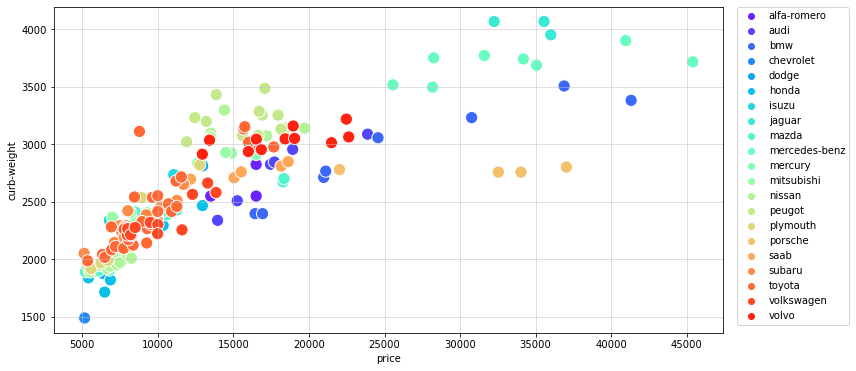

In [22]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="price", y="curb-weight", data=df, hue=df['make'], palette="rainbow", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

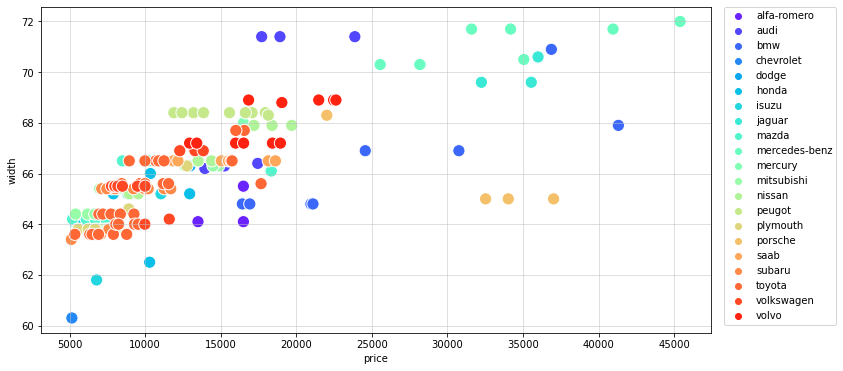

In [23]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="price", y="width", data=df, hue=df['make'], palette="rainbow", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

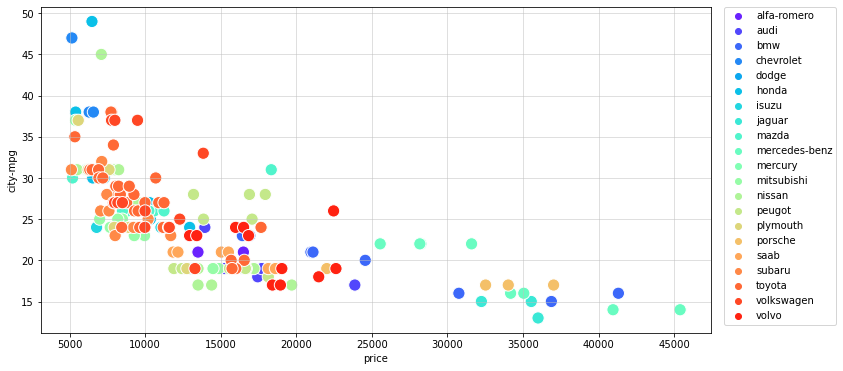

In [24]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="price", y="city-mpg", data=df, hue=df['make'], palette="rainbow", s=150)
plt.grid(b=True, which='major', color='silver', linewidth=0.5)
plt.grid(b=True, which='minor', color='silver', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Pie Plot
Pie plots are very good at showing distributions of categorical variables. When these categorical variables have low number of categories the graph is visually clear, otherwise it may be too crowded and will not convey a message. 
Below we can see that the sedan body style is the favorite one for our dataset, followed by hatchback. Together they cover up to 80% of the dataset. Convertible and Hardtop are not that common and therefore may have more uncertainty in price predictability. 

In [25]:
df['body-style'].value_counts()

sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64

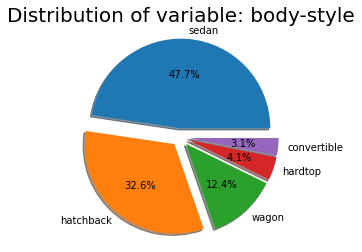

In [26]:
# Plotting a Pie Chart for marital status
labels = ['sedan','hatchback','wagon' ,'hardtop','convertible']

sizes = [df['body-style'].value_counts()[0],
         df['body-style'].value_counts()[1],
         df['body-style'].value_counts()[2],
         df['body-style'].value_counts()[3],
         df['body-style'].value_counts()[4]
        ]
explode=[0.1,0.1,0.1,0.1,0.1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax1.axis('equal')
plt.title('Distribution of variable: body-style', size=20)
plt.show()

### Bar Plot

The bar plot for engine type shows one category with the majority: ohc 73.1% of occurance.
This will surely influence the predictability of the model, since few data is available for others engine types, but lets wait and see if this is a relevant variable.


In [27]:
df['engine-type'].value_counts()

ohc     141
ohcf     15
ohcv     13
l        12
dohc     12
Name: engine-type, dtype: int64

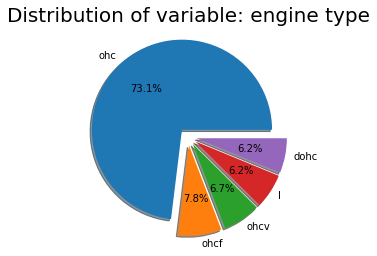

In [28]:
# Plotting a Pie Chart for marital status
labels = ['ohc','ohcf','ohcv' ,'l','dohc']

sizes = [df['engine-type'].value_counts()[0],
         df['engine-type'].value_counts()[1],
         df['engine-type'].value_counts()[2],
         df['engine-type'].value_counts()[3],
         df['engine-type'].value_counts()[4]
        ]
explode=[0.1,0.1,0.1,0.1,0.1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax1.axis('equal')
plt.title('Distribution of variable: engine type', size=20)
plt.show()

# Building a Linear Model:
Despite not cleaning up all variables and still considering some multicolinearity, the final dataset is ready for modelling. The categorical variables need to be transformed into dummy variables, as linear models can only predict on numerical values.


In [29]:
# IMPORT PACKAGES
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 


* Create a file with the dependent variable => price
* Create a separate file with all other variables => independent variables

In [30]:
ind_vars = df.drop(["price"], axis=1)
dep_var = df[["price"]]

* Transform categorical variables in independent variables

In [31]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,wheel-base,length,width,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,diesel,gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,130,3.47,2.68,111.0,5000.0,21,27,11.190476,8.703704,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,2.68,111.0,5000.0,21,27,11.190476,8.703704,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,3.47,154.0,5000.0,19,26,12.368421,9.038462,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,3.40,102.0,5500.0,24,30,9.791667,7.833333,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,3.40,115.0,5500.0,18,22,13.055556,10.681818,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


Once the dummy variables for categories are created it is possible to split the data between training and test. This split shall be done randomly in order to avoid concentration of some characteristics in one of them (train or test sets). The training set must have the higher number of rows, because it is where the model is built and needs to be "colorful" & "strong" enough to support different sets.

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.2, random_state=1
)

In [33]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 154
Number of rows in train data = 39


In [34]:
# CREATING A LINEAR REGRESSION MODEL
lr = LinearRegression() 

In [35]:
# Fitting the train data to calculate the linear regression
lr.fit(x_train, y_train) 

LinearRegression()

In [36]:
# Predicting the test values
predictions = lr.predict(x_test) 

In [37]:
# Finding the level of accuracy of our model (it is very high and may be overfitting)
print('R^2 of training set is ',lr.score(x_train, y_train))

R^2 of training set is  0.9703658327476429


In [38]:
# The accuracy dropped relatively to training set and shows a lower performance
print('R^2 of test set is',lr.score(x_test, y_test))

R^2 of test set is 0.8504881140905359


In [39]:
# Values for the different metrics on test set
print("MAE", metrics.mean_absolute_error(y_test,predictions))  # Mean Absolute error
print("MSE", metrics.mean_squared_error(y_test,predictions)) # Mean Square error
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,predictions))) # Root Mean Square error

MAE 1994.8914531457158
MSE 11321063.827027116
RMSE 3364.6788594198874


In [40]:
# Coefecient values for the different variables
va = lr.coef_
coeff_data = pd.DataFrame()
coeff_data['Feature'] = x_train.columns
coeff_data['Coefs'] = lr.coef_[0]

coeff_data = coeff_data.append({'Feature': "Intercept", 'Coefs': lr.intercept_}, ignore_index = True)
coeff_data

,Feature,Coefs
0,wheel-base,36.6746
1,length,-24.3452
2,width,749.085
3,curb-weight,3.95132
4,engine-size,218.389
5,bore,-15504.5
6,stroke,-2381.15
7,horsepower,-28.8927
8,peak-rpm,2.35959
9,city-mpg,312.892


In [41]:
# Let us write the equation to calculate future prices of cars
Equation = "Charge ="
print(Equation, end='\t')
for i in range(0, 7):
    if(i!=6):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

Charge =	( 36.67463556711399 ) * wheel-base +  ( -24.34516512708014 ) * length +  ( 749.0851624949117 ) * width +  ( 3.9513159248621506 ) * curb-weight +  ( 218.38912538318215 ) * engine-size +  ( -15504.501074006848 ) * bore +  -2381.152384217736


In [42]:
# Check the most important statistical data
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price"], train)
    return olsmodel.fit()


olsmodel = build_ols_model(x_train)
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     60.03
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.31e-56
Time:                        18:31:05   Log-Likelihood:                -1329.5
No. Observations:                 154   AIC:                             2769.
Df Residuals:                      99   BIC:                             2936.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

In [43]:
# predictions on the test set
pred = pd.DataFrame({"Actual": y_test.values.flatten(), "Predicted": predictions.flatten()})
pred

,Actual,Predicted
0,35550,32250.000000
1,6669,7100.697925
2,10698,12498.616922
3,7895,9125.853083
4,13415,15634.795183
5,20970,22274.107092
6,15040,31728.277888
7,7099,11261.724150
8,7957,7152.544081
9,13295,10681.041282


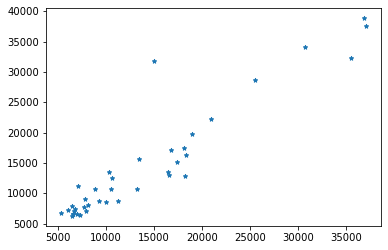

In [44]:
# Drawing the Scatter plot for y_test data and predictions to see the accuracy.
plt.scatter(y_test, predictions, s = 17, marker='*') 

<AxesSubplot:ylabel='Density'>

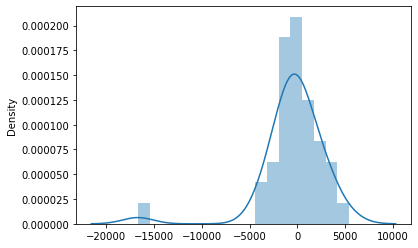

In [45]:
# Distribution plot for showing the error rate
sns.distplot(y_test-predictions) 

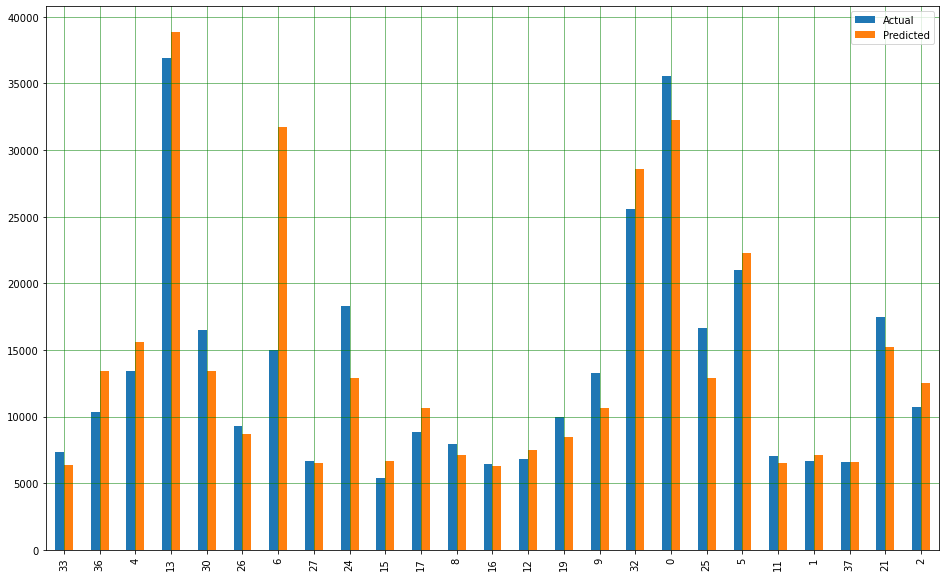

In [46]:
np.random.seed(42)
df1 = pred.sample(25)
df1.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()